# Analisi del Sentimento

## Indice

- [1. Introduzione e contesto](#1.-Introduzione-e-contesto)
- [2. Data Analysis](#2.-Data-Analysis)
    - [2.1 Dataset](#2.1-Dataset)
    - [2.2 Analisi](#2.2-Analisi)
    - [2.3 Conclusioni dell'analisi](#2.3-Conclusioni-dell'analisi)
- [3. Confronto tra modelli](#3.-Confronto-tra-modelli)
    - [3.1 Confusion Matrix](#3.1-Confusion-Matrix)
    - [3.2 Classification Report](#3.2-Classification-Report)
- [4. Implementazione](#4.-Implementazione)
    - [4.1 Package Reddit](#4.1-Package-Reddit)
    - [4.2 Package SentimentAnalysis](#4.2-Package-SentimentAnalysis)
    - [4.3 Struttura del sito](#4.3-Struttura-del-sito)
    - [4.4 Struttra dell'API](#4.4-Struttra-dell'API)
- [5. Installazione](#5.-Installazione)

## 1. Introduzione e contesto

Il Sentiment Analysis è un processo automatico che determina il tono (positivo, negativo o neutrale) di un testo.
In altre parole questa è una tecnica del linguaggio natuarale che permette di capire cosa le persone pensano riguardo a un determinato argomento. <br>
Oggi giorno le aziende possono utilizzare algoritmi di NLP per analizzare recensioni, commenti sui social media e altri dati testuali, classificando il sentimento in positivo, negativo o neutro. In questo modo posso avere un feedback, in maniera automatizzata, del loro prodotto o servizio. <br>

Questo progetto ha lo scopo di implementare un meccanismo di Sentiment Analysis che mostri come varia il pensiero dalle gente nel tempo all'interno di un dato subreddit.
L'applicazione comprende sia un'interfaccia web che un sistema di API. <br>
L'interfaccia Web chiede all'utente di inserire il nome del subreddit per poi andare a mostrare due grafici: l'andamento del sentimento nel tempo e il numero di post e commenti presi in considerazione. <br>
Grazie a una API è anche possibile direttamente i dati, per poterli analizzare in autonomia.

## 2. Data Analysis

### 2.1 Dataset

Il dataset scelto è disponibile su Kaggle <a href="https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset">a questo link</a>.
Questo è composto da due colonne <i>clean_comment</i> e <i>category</i>.<br>
La colonna <i>clean_comment</i> contiene i post e i commenti estratti da vari SubReddits, già ripuliti. Tutti i post trattano delle elezioni in India del 2019, in particolare vertono su Modi (Candito al ruolo di primo ministro indiano nel 2019) e altri canditati al ruolo di primo ministro.
La colonna <i>category</i>, invece, contiene dei valori numerici:
<ul>
    <li>-1, che indica un commento Negativo</li>
    <li>0, che indica un commento Neutrale</li>
    <li>1, che indica un commento Positivo</li>
</ul>

Il dataset ha circa 37 mila commenti, ogniuno associato alla label che indica il sentimento <br>

### 2.2 Analisi

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dataset = pd.read_csv("./Reddit_data.csv")
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [ ]:
print(f"Il dataset contiene {dataset.shape[0]} righe e {dataset.shape[1]} colonne.")
print(f"Numero di post etichettati negativi: {len(dataset.query('category == -1'))}")
print(f"Numero di post etichettati neutri: {len(dataset.query('category == 0'))}")
print(f"Numero di post etichettati positivi: {len(dataset.query('category == 1'))}")

Il dataset contiene 37149 righe e 2 colonne.
Numero di post etichettati negativi: 8277
Numero di post etichettati neutri: 13042
Numero di post etichettati positivi: 15830


Informazioni sui post etichettati negativi:
Numero medio di parole: 34.79
Lunghezza media in caratteri: 214.80
Le 20 parole più comuni nei post etichettati negativi, con la relativa frequenza, sono [('the', 14538), ('and', 7737), ('that', 4124), ('this', 3829), ('for', 3312), ('you', 3048), ('are', 2981), ('they', 2551), ('not', 2525), ('have', 2202), ('but', 2065), ('with', 2007), ('was', 1697), ('will', 1667), ('people', 1560), ('all', 1543), ('bjp', 1524), ('what', 1414), ('from', 1375), ('like', 1343)].


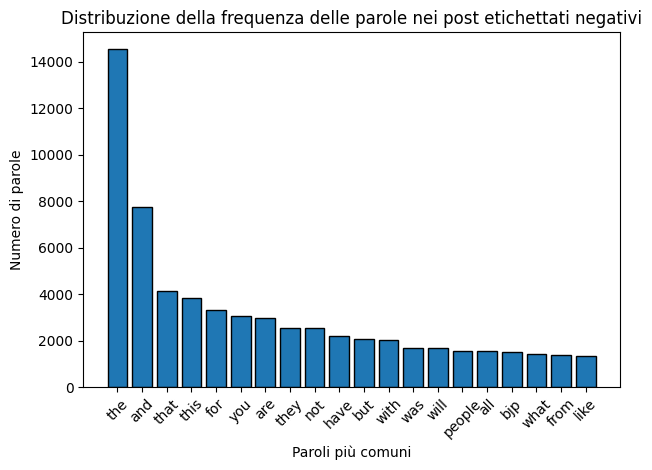

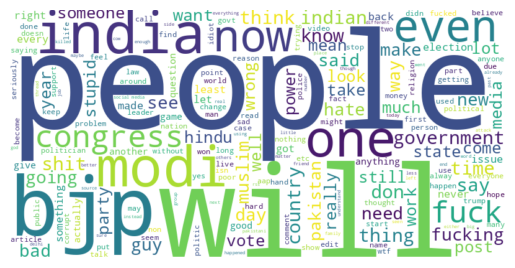

In [ ]:
print("Informazioni sui post etichettati negativi:")
negative_posts = dataset.query('category == -1').copy()

negative_posts['word_count'] = negative_posts['clean_comment'].str.split().apply(len)
mean_word_count = negative_posts['word_count'].mean()
print(f"Numero medio di parole: {mean_word_count:.2f}")

avg_length_chars = negative_posts['clean_comment'].str.len().mean()
print(f"Lunghezza media in caratteri: {avg_length_chars:.2f}")

all_words = ' '.join(negative_posts['clean_comment']).lower().split()
common_words = Counter(all_words).most_common(20)
print(f"Le 20 parole più comuni nei post etichettati negativi, con la relativa frequenza, sono {common_words}.")

x_values = [word for word, _ in common_words]
y_values = [freq for _, freq in common_words]

plt.bar(x_values, y_values,  edgecolor='black')
plt.xlabel('Paroli più comuni')
plt.ylabel('Numero di parole')
plt.title('Distribuzione della frequenza delle parole nei post etichettati negativi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


text = ' '.join(negative_posts['clean_comment']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Informazioni sui post etichettati Neutri:
Numero medio di parole: 9.75
Lunghezza media in caratteri: 59.57
Le 20 parole più comuni nei post etichettati neutrali, con la relativa frequenza, sono [('the', 5730), ('and', 2016), ('this', 1624), ('you', 1571), ('for', 1350), ('that', 1297), ('are', 1091), ('same', 1031), ('not', 863), ('modi', 847), ('what', 843), ('they', 762), ('with', 753), ('will', 723), ('have', 713), ('bjp', 675), ('can', 650), ('like', 628), ('india', 594), ('was', 563)].


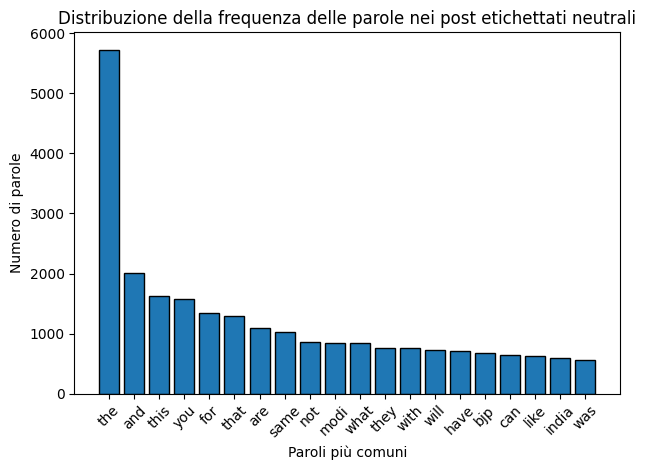

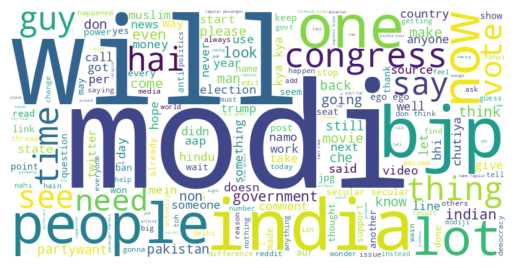

In [ ]:
print("Informazioni sui post etichettati Neutri:")
neutral_posts = dataset.query('category == 0').copy()

neutral_posts['word_count'] = neutral_posts['clean_comment'].str.split().apply(len)
mean_word_count = neutral_posts['word_count'].mean()
print(f"Numero medio di parole: {mean_word_count:.2f}")

avg_length_chars = neutral_posts['clean_comment'].str.len().mean()
print(f"Lunghezza media in caratteri: {avg_length_chars:.2f}")

all_words = ' '.join(neutral_posts['clean_comment']).lower().split()
common_words = Counter(all_words).most_common(20)
print(f"Le 20 parole più comuni nei post etichettati neutrali, con la relativa frequenza, sono {common_words}.")

x_values = [word for word, _ in common_words]
y_values = [freq for _, freq in common_words]

plt.bar(x_values, y_values,  edgecolor='black')
plt.xlabel('Paroli più comuni')
plt.ylabel('Numero di parole')
plt.title('Distribuzione della frequenza delle parole nei post etichettati neutrali')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


text = ' '.join(neutral_posts['clean_comment']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Informazioni sui post etichettati Positivi:
Numero medio di parole: 42.78
Lunghezza media in caratteri: 264.28
Le 20 parole più comuni nei post etichettati positivi, con la relativa frequenza, sono [('the', 37445), ('and', 19205), ('that', 9960), ('for', 8325), ('this', 8035), ('you', 7117), ('are', 6496), ('have', 5470), ('they', 5345), ('not', 5312), ('with', 5088), ('but', 4732), ('will', 4517), ('was', 4118), ('people', 3585), ('has', 3358), ('india', 3252), ('can', 3096), ('all', 3084), ('like', 3075)].


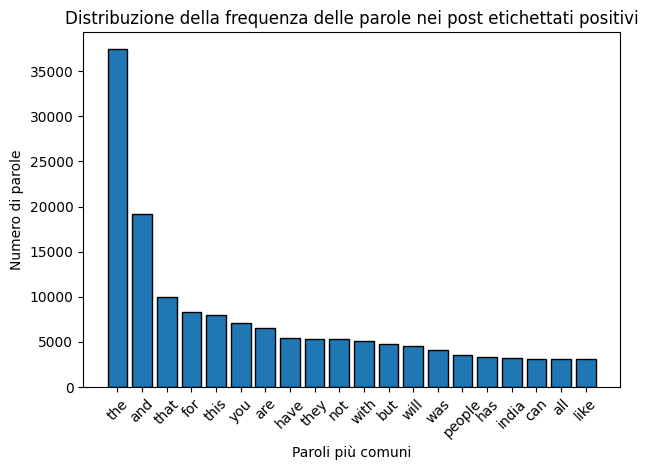

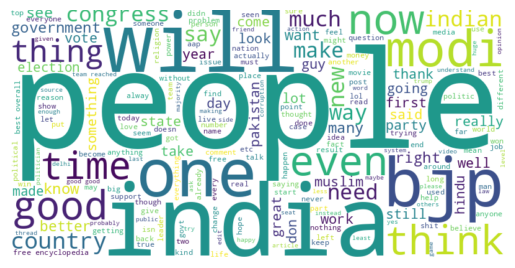

In [ ]:
print("Informazioni sui post etichettati Positivi:")
positive_posts = dataset.query('category == 1').copy()

positive_posts['word_count'] = positive_posts['clean_comment'].str.split().apply(len)
mean_word_count = positive_posts['word_count'].mean()
print(f"Numero medio di parole: {mean_word_count:.2f}")

avg_length_chars = positive_posts['clean_comment'].str.len().mean()
print(f"Lunghezza media in caratteri: {avg_length_chars:.2f}")

all_words = ' '.join(positive_posts['clean_comment']).lower().split()
common_words = Counter(all_words).most_common(20)
print(f"Le 20 parole più comuni nei post etichettati positivi, con la relativa frequenza, sono {common_words}.")

x_values = [word for word, _ in common_words]
y_values = [freq for _, freq in common_words]

plt.bar(x_values, y_values,  edgecolor='black')
plt.xlabel('Paroli più comuni')
plt.ylabel('Numero di parole')
plt.title('Distribuzione della frequenza delle parole nei post etichettati positivi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


text = ' '.join(positive_posts['clean_comment']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.3 Conclusioni dell'analisi

Andiamo a fare un confronto tra le analisi dei tre possibili label:

<table>
    <tr>
        <td>Valore del confronto</td>
        <td>Commenti Positivi</td>
        <td>Commenti Neutrali</td>
        <td>Commenti Positivi</td>
    </tr>
    <tr>
        <td>Numero Medio di parole</td>
        <td>42.78</td>
        <td>9.75</td>
        <td>34.79</td>
    </tr>
    <tr>
        <td>Numero medio di caratteri</td>
        <td>264.28</td>
        <td>59.57</td>
        <td>214.80</td>
    </tr>
</table>

Possiamo notare come <i>i commenti neutrali risultano mediamente più corti</i>.

<div style="display: flex; justify-content: space-around;">
    <img src="img/parole_positive.png" style="width: 30%;"/>
    <img src="img/parole_neutrali.png" style="width: 30%;"/>
    <img src="img/parole_negative.png" style="width: 30%;"/>
</div>

Com'è classico in questi casi, la distribuzione delle parole non ci dà significativi informazioni. Le parole più usate sono in comune a tutte le categorie e sono perlopiù articoli e congiunzioni.


<div style="display: flex; justify-content: space-around;">
    <div>
        <img src="img/word_cloud_positive.png" style="width: 80%;"/>
        <p>Word Cloud Positive</p>
    </div>
    <div>
        <img src="img/word_cloud_neutrali.png" style="width: 80%;"/>
        <p>Word Cloud Neutrali</p>
    </div>
    <div>
        <img src="img/word_cloud_negative.png" style="width: 80%;"/>
        <p>Word Cloud Negative</p>
    </div>
</div>

Possiamo notare come i word cloud <i>ci danno qualche informazione</i>.
Le parole più comuni, anche dopo la rimozione delle così dette Stop word (articoli, congiunzioni, ecc), sono in comune a tutte e tre le categorie. In particolare abbiamo Modi, BJP (Bharatiya Janata Party, partito del polo indiano), india, people, ecc. <br>
Osservando più attentamente, però, possiamo notare che vi è qualche differenza tra le parole meno frequenti. In particolare nella label negativa sono frequenti insulti, che non riporterò, mentre nella label positive sono presenti complimenti e parole come "better", "good", "great" e simili.

## 3. Confronto tra modelli

Per realizzare la Sentiment Analysis occore scegliere e addestrare un modello capace di riconoscere se un post o un commento è classificabile come "Positivo", "Neutrale" o "Negativo". <br>
Per realizzare ciò si vanno a confrantare tre diversi modelli: <a href="https://github.com/Francesco-Della-Maggiora/ProgettoLaboratorioInfomaticaApplicata/blob/Doc/twitter_roberta_base_sentiment_latest.ipynb">cardiffnlp/twitter-roberta-base-sentiment-latest</a>, <a href="https://github.com/Francesco-Della-Maggiora/ProgettoLaboratorioInfomaticaApplicata/blob/Doc/finetuning_sentiment_model_reddit_data.ipynb">akshataupadhye/finetuning-sentiment-model-reddit-data
</a> e <a href="https://github.com/Francesco-Della-Maggiora/ProgettoLaboratorioInfomaticaApplicata/blob/Doc/bert-base-uncased.ipynb">bert-base-uncased</a>. Da qui in avanti i modelli verranno chiamati rispettivamente <i>Modello 1</i>, <i>Modello 2</i> e <i>Modello 3</i><br>
Tutti questi modelli hanno subito un processo di Transfert Learning sul solito dataset, descritto sopra. Andiamo a confrontare i risultati che hanno avuto sul medesimo TestSet.

### 3.1 Confusion Matrix

Per un primo confronto riportiamo le matrici di confuzioni, normalizzate alle percentuali.

<div style="display: flex; justify-content: space-around;">
    <div>
        <p>Modello 1</p>
        <img src="img/confusionMatrix1.png" style="width: 80%;"/>
    </div>
    <div>
        <p>Modello 2</p>
        <img src="img/confusionMatrix2.png" style="width: 80%;"/>
    </div>
    <div>
        <p>Modello 3</p>
        <img src="img/confusionMatrix3.png" style="width: 80%;"/>
    </div>
</div>

### 3.2 Classification Report

Come secondo confronto si è scelto di usare la funzione <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report">sklearn.metrics.classification_report</a>. <br>
Questa funzione va a calcolare per ogni classe precision, recall, F1 e support.
Ricordiamo che:
$$ \text{precision} = \frac{TP}{TP + FP} $$
$$ \text{recal} = \frac{TP}{TP + FN} $$
$$ F1 = 2 \cdot \frac{\text{precision} \cdot \text{recal}}{\text{precision} + \text{recal}} $$
Infine, con support si indica il numero di valori testati per ogni classe.

<table>
    <tr>
        <td colspan=5 style="text-align: center">Modello 1</td>
    </tr>
    <tr>
        <td>Classe</td>
        <td>Precision</td>
        <td>Recal</td>
        <td>F1</td>
        <td>Support</td>
    </tr>
    <tr>
        <td> Positivo </td>
        <td> 0.94 </td>
        <td> 0.96 </td>
        <td> 0.95 </td>
        <td> 1583 </td>
    </tr>
    <tr>
        <td> Neutrale </td>
        <td> 0.98 </td>
        <td> 0.97 </td>
        <td> 0.98 </td>
        <td> 1304 </td>
    </tr>
    <tr>
        <td> Negativo </td>
        <td> 0.92 </td>
        <td> 0.88 </td>
        <td> 0.90 </td>
        <td> 828 </td>
    </tr>
</table>

<table style="margin-top: 15px">
    <tr>
        <td colspan=5 style="text-align: center">Modello 2</td>
    </tr>
    <tr>
        <td>Classe</td>
        <td>Precision</td>
        <td>Recal</td>
        <td>F1</td>
        <td>Support</td>
    </tr>
    <tr>
        <td> Positivo </td>
        <td> 0.95 </td>
        <td> 0.96 </td>
        <td> 0.95 </td>
        <td> 1583 </td>
    </tr>
    <tr>
        <td> Neutrale </td>
        <td> 0.98 </td>
        <td> 0.97 </td>
        <td> 0.98 </td>
        <td> 1304 </td>
    </tr>
    <tr>
        <td> Negativo </td>
        <td> 0.91 </td>
        <td> 0.91 </td>
        <td> 0.91 </td>
        <td> 828 </td>
    </tr>
</table>

<table style="margin-top: 15px">
    <tr>
        <td colspan=5 style="text-align: center">Modello 3</td>
    </tr>
    <tr>
        <td>Classe</td>
        <td>Precision</td>
        <td>Recal</td>
        <td>F1</td>
        <td>Support</td>
    </tr>
    <tr>
        <td> Positivo </td>
        <td> 0.93 </td>
        <td> 0.96 </td>
        <td> 0.94 </td>
        <td> 1583 </td>
    </tr>
    <tr>
        <td> Neutrale </td>
        <td> 0.98 </td>
        <td> 0.97 </td>
        <td> 0.98 </td>
        <td> 1304 </td>
    </tr>
    <tr>
        <td> Negativo </td>
        <td> 0.91 </td>
        <td> 0.87 </td>
        <td> 0.89 </td>
        <td> 828 </td>
    </tr>
</table>


Osservando le varie metriche prese in cosiderazione ci rendiamo conto che il modello che ha le prestazioni migliori è <b>il modello 2</b> ovvero akshataupadhye/finetuning-sentiment-model-reddit-data.

## 4. Implementazione

Per la implementare l'applicazione è stato usato il <a href="https://flask.palletsprojects.com/en/stable/">Framework Flask</a>, in modo da implementare in maniera semplice sia l'interfaccia web sia l'API. <br>
Inoltre, per poter richiedere i post e i commenti dai subreddit è stata usata <a href="https://praw.readthedocs.io/en/stable/">la libreria PRAW</a>.

### 4.1 Package Reddit

Il Package Reddit si occupa di gestire  è composto da 5 classi: 
<ul>
    <li>RedditAPI (che si occupa di gestire le richeiste, facendo da Wrapper alla libreria PRAW)</li>
    <li>Coment (che rappresenta un commento su Reddit)</li>
    <li>Comment List (che rappresenta una lista di commenti)</li>
    <li>Post (Che rappresenta un Post su Reddit)</li>
    <li>Post List (Che rappresenta una list di Post)</li>
</ul>

### 4.2 Package SentimentAnalysis

Il Package SentmentAnalysis si occupa di sia dell'Analisi del Sentimento vera e propria sia di graficare i risultati. Questo è composto da due classi:
<ul>
    <li>SentimentAnalyzer (che va a wrappare il modello)</li>
    <li>SentimentPlotter (che va a creare i vari grafici)</li>
</ul>
Per realizzare i grafici, si considera la percentuale di Post positivi (neutrali o negativi) come il rapporto tra il numero di Post positivi (neutrali o negativi) diviso il numero totale di Post

### 4.3 Struttura del sito

All'avvio il software questo avvierà un HTTP server che risponde a <a href="http://127.0.0.1:5000">127.0.0.1:5000</a>.
Alla route '/' risponderà la schermata principale del sito. Da qui sarà possibile andare a inserire il nome del subreddit su cui fare l'Analisi del sentimento.
Inoltre, cliccando su "Mostra impostazioni avanzate" saranno personalizabbili alcune opzioni:
<ul>
    <li>Il numero di Post che verranno presi in considerazione (Default 10)</li>
    <li>Il numero di punti nei grafici (Default 10)</li>
    <li>Il titolo del grafico del sentimento (Default nessun titolo)</li>
    <li>Il titolo del grafico del Numero di Post (Default nessun titolo)</li>
    <li>Dimensione, in pollici, dell'asse X dei gue grafici (Default 15)</li>
    <li>Dimensione, in pollici, dell'asse Y dei gue grafici (Default 5)</li>
</ul>

L'interfaccia è mostrata nelle figure qui sotto:
<div style="display: flex; justify-content: space-around;">
    <div>
        <p>Schermata Principale</p>
        <img src="img/main_page.png" style="width: 80%;"/>
    </div>
    <div>
        <p>Schermata Principale, con le impostazioni Avanzate</p>
        <img src="img/main_page_opzioni_avanzate.png" style="width: 80%;"/>
    </div>
    <div>
        <p>Schermata delle Risposte</p>
        <img src="img/Response_page.png" style="width: 80%;"/>
    </div>
</div>

### 4.4 Struttra dell'API

L'unica route APi è /api/analyze. <br>
Questa route consente di eseguire un'analisi sui post e i commenti di un determinato subreddit.
Il parametro obbligatorio è <i>subreddit_name</i> che contiene il nome del subreddit su cui fare l'analisi.
API accenta anche un parametro opzionale <i>limit</i> (Defualt 10) che indica il numero di post su cui fare l'analisi. Se il valore di limit è minore o uguale di 0 viene preso in considerazione il valore di Default. <br>
Il ritorno di questa API è un dizionario, in formato JSON, avente come chiavi i timestamp a cui sono stati postati i post o i commenti e come valore il risultato dell'analisi. <br>
Ad esempio: <br>
<i>/api/analyze?subreddit_name=python&limit=1</i> <br>
Risposta <br>
<i>{
  "2025-06-28T13:57:13+00:00": { 
    "Negativo": 0, 
    "Neutrale": 0, 
    "Positivo": 1
  }
}</is>

## 5. Installazione

Il codice sorgente di questo progetto, completo dei file necessari per l’utilizzo con Docker (Dockerfile e docker-compose.yml), è disponibile <a href="https://github.com/Francesco-Della-Maggiora/ProgettoLaboratorioInfomaticaApplicata/tree/master">su GitHub</a>. <br>
Dopo aver scaricato il progetto da GitHub, è necessario scaricare la cartella <i>config</i> da <a href="https://drive.google.com/drive/folders/1rwfcpZsJc6O5AF6UAdTVVm5fnv6XeY-4?usp=drive_link">https://drive.google.com/drive/folders/1rwfcpZsJc6O5AF6UAdTVVm5fnv6XeY-4?usp=drive_link</a> e copiarla all’interno della cartella <i>app</i>. <br>
Questa cartella contiene il file <i>config.json</i>, che memorizza le informazioni necessarie al funzionamento delle API di Reddit, e sottocartella <i>finetuning-sentiment-model-reddit-data</i>, 
che include il modello. <br>

A questo punto basterà aprire un terminale e lanciare il comando <i>docker-compose up</i> per poter lanciare l'applicazione.